In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
car_data = pd.read_csv('car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

**Pretraitement des donnees**

In [ ]:
car_data = car_data.drop_duplicates()

In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data[car_data['Driven_kms'] == 500000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [ ]:
car_data = car_data[car_data['Driven_kms'] != 500000]

In [ ]:
car_data[car_data['Driven_kms'] > 100000]

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
37,800,0.35,2.28,127000,0,1,0,0,22
50,fortuner,14.90,30.61,104707,1,0,1,0,13
53,fortuner,16.00,30.61,135000,1,1,1,0,12
77,corolla,1.50,12.35,135154,0,0,1,0,21
84,innova,3.49,13.46,197176,1,0,0,0,20
85,camry,2.50,23.73,142000,0,1,1,3,19
179,Honda Karizma,0.31,1.05,213000,0,1,0,0,15


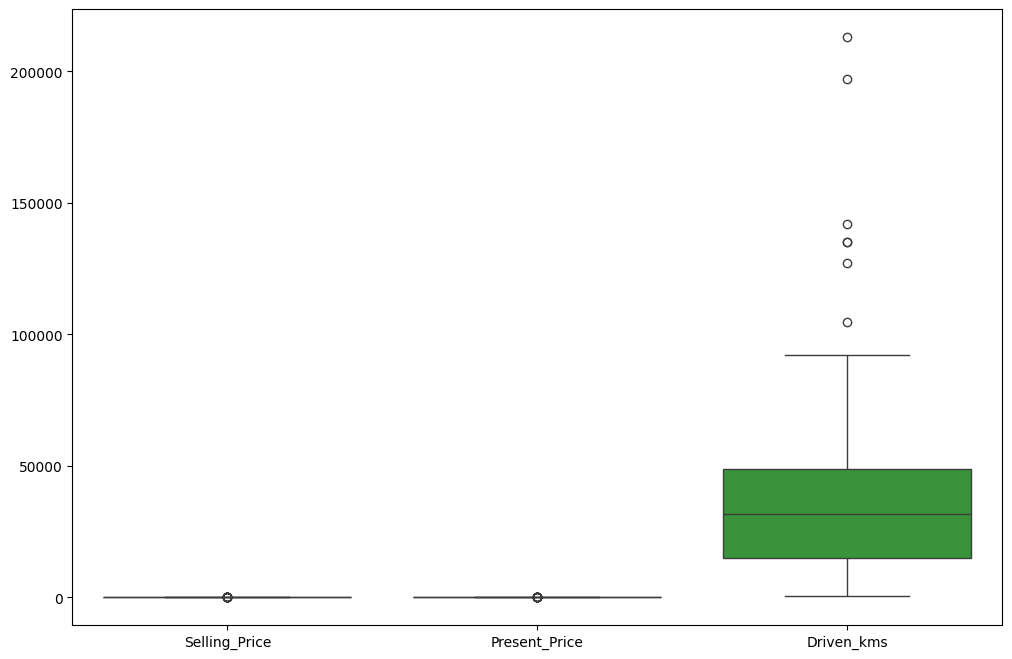

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(data= car_data[['Selling_Price', 'Present_Price', 'Driven_kms']])
plt.show()

In [ ]:
current_year = datetime.now().year

In [ ]:
car_data['Age'] = current_year - car_data['Year']

In [ ]:
car_data = car_data.drop(columns=['Year'])

**categorical data encoding**

In [ ]:
fuel_type_mapping = {
    'Petrol': 0,
    'Diesel': 1,
    'CNG': 2
}

selling_type_mapping = {
    'Dealer': 0,
    'Individual': 1
}

transmission_mapping = {
    'Manual': 0,
    'Automatic': 1
}

In [ ]:
car_data['Fuel_Type'] = car_data['Fuel_Type'].replace(fuel_type_mapping).astype(int)

car_data['Selling_type'] = car_data['Selling_type'].replace(selling_type_mapping).astype(int)

car_data['Transmission'] = car_data['Transmission'].replace(transmission_mapping).astype(int)

In [ ]:
car_data.head(10)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11
5,vitara brezza,9.25,9.83,2071,1,0,0,0,7
6,ciaz,6.75,8.12,18796,0,0,0,0,10
7,s cross,6.50,8.61,33429,1,0,0,0,10
8,ciaz,8.75,8.89,20273,1,0,0,0,9
9,ciaz,7.45,8.92,42367,1,0,0,0,10


In [ ]:
def extract_brand(name):
    brand_keywords = {
        'Maruti': ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni'],
        'Toyota': ['fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd', 'camry', 'land cruiser'],
        'Royal Enfield': ['Royal Enfield Thunder 500', 'Royal Enfield Classic 350', 'Royal Enfield Thunder 350', 'Royal Enfield Classic 500', 'Royal Enfield Bullet 350'],
        'Bajaj': ['Bajaj Dominar 400', 'Bajaj Pulsar RS200', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Bajaj Pulsar 150', 'Bajaj Pulsar NS 200', 'Bajaj Pulsar 220 F'],
        'Hyundai': ['i20', 'grand i10', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna'],
        'Honda': ['city', 'brio', 'amaze', 'jazz', 'Honda CB Hornet 160R', 'Honda CBR 150', 'Honda Activa 4G'],
        'Yamaha': ['Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'Yamaha FZ  v 2.0', 'Yamaha Fazer'],
        'KTM': ['KTM RC200', 'KTM RC390', 'KTM 390 Duke'],
        'TVS': ['TVS Apache RTR 160', 'TVS Apache RTR 180', 'TVS Sport', 'TVS Jupyter'],
        'Hero': ['Hero Extreme', 'Hero Passion X pro', 'Hero Passion Pro', 'Hero Splender Plus'],
    }

    for brand, models in brand_keywords.items():
        if name in models:
            return brand
    return 'Unknown'


In [ ]:
car_data['Brand'] = car_data['Car_Name'].apply(extract_brand)

In [ ]:
motorbike_brands = ['Royal Enfield', 'Bajaj', 'KTM', 'Yamaha', 'TVS', 'Hero', 'Honda']
car_data['Vehicle_Type'] = car_data['Brand'].apply(lambda x: 'Motorbike' if x in motorbike_brands else 'Car')

In [ ]:
# Encodage de la colonne "Brand"
brand_encoder = LabelEncoder()
car_data['Brand'] = brand_encoder.fit_transform(car_data['Brand'])

# Encodage de la colonne "Vehicle_Type"
car_data['Vehicle_Type'] = car_data['Vehicle_Type'].map({'Car': 0, 'Motorbike': 1})

In [ ]:
car_data.drop(columns=['Car_Name'], inplace=True)

**the training part of the model**

In [ ]:
import pandas as pd

Vehicle_data = pd.read_csv('Vehicle-Data(After treatment).csv')

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
y = Vehicle_data['Selling_Price']
X = Vehicle_data.drop(columns=['Selling_Price'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R^2 score: {r2}")

MAE : 1.2232709926965335
MSE : 3.0351610546632464
RMSE : 1.7421713620259192
R^2 score: 0.8770741035881624


**Ridge**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
params = {'alpha': [0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = ridge_cv.best_params_['alpha']
print(f"Meilleur alpha: {ridge_cv.best_params_['alpha']}")

Meilleur alpha: 10


In [ ]:
ridge = Ridge(best_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
print("Pour Ridge Regression")
print(f"MAE : {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE : {mean_squared_error(y_test, y_pred_ridge)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R^2 score: {r2_score(y_test, y_pred_ridge)}")

Pour Ridge Regression
MAE : 1.1721698215508503
MSE : 2.8973865065892
RMSE : 1.7021711155430879
R^2 score: 0.882654057837614


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso_cv = GridSearchCV(Lasso(), params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = lasso_cv.best_params_['alpha']
print(f"Meilleur alpha pour Lasso Regression: {best_alpha}")

Meilleur alpha pour Lasso Regression: 0.01


In [ ]:
lasso = Lasso(best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
print("Pour Lasso Regression")
print(f"MAE : {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE : {mean_squared_error(y_test, y_pred_lasso)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R^2 score: {r2_score(y_test, y_pred_lasso)}")

Pour Lasso Regression
MAE : 1.2081257899718572
MSE : 3.0035077729088306
RMSE : 1.7330631185588223
R^2 score: 0.8783560810397576


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(n_estimators=10, random_state=3)

In [ ]:
RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=3)

In [ ]:
y_pred_RF = RF.predict(X_test)

In [ ]:
print(f"MAE : {mean_absolute_error(y_test, y_pred_RF)}")
print(f"MSE : {mean_squared_error(y_test, y_pred_RF)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_RF))}")
print(f"R^2 score: {r2_score(y_test, y_pred_RF)}")

MAE : 0.7651666666666668
MSE : 2.0820329333333336
RMSE : 1.4429251308828652
R^2 score: 0.9156763808972358


***Manual Testing***

In [ ]:
import joblib
import numpy as np
import pandas as pd


Random_Forest_model = joblib.load("Random_Forest_model.pkl")

# Demander les caractéristiques de la voiture
present_price = float(input("Present price\ : "))
driven_kms = float(input("Driven kms (km) : "))
fuel_type = input("Fuel (Petrol/Diesel/CNG) : ").lower()
selling_type = input("Selling type (Dealer/Individual) : ").lower()
transmission = input("Transmission (Manual/Automatic) : ").lower()
owner = int(input("Owner : "))
age = int(input("Vehicle age : "))
brand = input("Brand : ").lower()
vehicle_type = input("vehicle type (Car/ Motorbike) : ").lower()

fuel_type_dict = {
    'petrol': 0,
    'diesel': 1,
    'cng': 2
}

selling_type_dict = {
    'dealer': 0,
    'individual': 1
}

transmission_dict = {
    'manual': 0,
    'automatic': 1
}

brand_dict = {
        'Maruti': 0,
        'Toyota': 1,
        'Royal Enfield': 2,
        'Bajaj': 3,
        'Hyundai': 4,
        'Honda': 5,
        'Yamaha': 6,
        'KTM': 7,
        'TVS': 8,
        'Hero': 9,
        'Unknown': 10
    }

vehicle_type_dict = {'car': 0, 'motorbike': 1}

fuel_encoded = fuel_type_dict.get(fuel_type)
selling_encoded = selling_type_dict.get(selling_type)
transmission_encoded = transmission_dict.get(transmission)
brand_encoded = brand_dict.get(brand, 10)
vehicle_type_encoded = vehicle_type_dict.get(vehicle_type)

columns = ['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Age', 'Brand', 'Vehicle_Type']


input_data = pd.DataFrame([[present_price, driven_kms, fuel_encoded, selling_encoded, transmission_encoded, owner, age, brand_encoded,
                            vehicle_type_encoded]], columns=columns)


prediction = Random_Forest_model.predict(input_data)[0]


print("\n💰 Prédictions du prix de la voiture 💰")
print(f"Selling Price : {prediction:.2f} ")



Present price\ : 20
Driven kms (km) : 144000
Fuel (Petrol/Diesel/CNG) : Diesel
Selling type (Dealer/Individual) : Individual
Transmission (Manual/Automatic) : Automatique
Owner : 0
Vehicle age : 8
Brand : Passat
vehicle type (Car/ Motorbike) : Car

💰 Prédictions du prix de la voiture 💰
Selling Price : 14.12 
